# Neural networks with PyTorch

### Goal
Build a neural network to identify text in an image, using the MNIST dataset which consists of greyscale handwritten digits. Each image is 28x28 pixels, a sample is presented below

<img src='mnist.png'>


The neural network will can one of these images and predict the digit in the image. The dataset is provided through the `torchvision` package.

In [1]:
# Loading packages

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

First the MNIST dataset is downloaded, then the training and test datasets are created.

In [2]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print("type:", type(images))
print("shape image:", images.shape)
print("shape labels:", labels.shape)

type: <class 'torch.Tensor'>
shape image: torch.Size([64, 1, 28, 28])
shape labels: torch.Size([64])


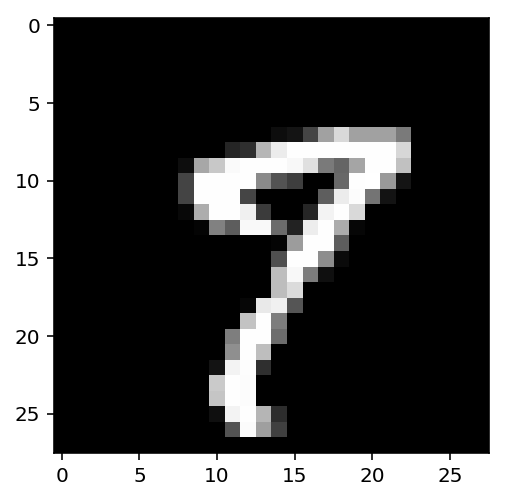

In [4]:
# Have a look at one of the images
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [ ]:
# First define an activation function
def activation(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1 + torch.exp(-x))

In [ ]:
# Reshape the images
features = images.view(64,784)
features

In [ ]:
# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features 
                                # and I take 2nd position in the shape here 784; shape[0] is the first position 64
n_hidden = 256                    # Number of hidden units 
n_output = 10                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [ ]:
h = activation(torch.mm(features, W1)+B1)
h